# [Go to "10 minutes to `pandas`"](https://pandas.pydata.org/docs/getting_started/10min.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Object Creation

## 1.1 Series

> Creating a `Series` from a list of values. `pandas` by default adds a `RangeIndex`:

In [2]:
s = pd.Series([1, 2, 3, 'a', 'b', 'c', '', np.nan], name='stuff')
s

0      1
1      2
2      3
3      a
4      b
5      c
6       
7    NaN
Name: stuff, dtype: object

> Creating a `Series` from a numpy `ndarray`:

In [3]:
an_array = np.array([2.55, -4.015, 8, np.nan, 128])
s = pd.Series(an_array, dtype='float32')
s

0      2.550
1     -4.015
2      8.000
3        NaN
4    128.000
dtype: float32

## 1.2 Dataframes

> Creating a `DataFrame` with a `DatetimeIndex` and column labels, from a `NumPy` array:

In [4]:
# creating the datetime index
dates = pd.date_range('2020-01-01', periods=7)

# creating the NumPy array
data_array = np.random.randn(7, 4)

# creating the DataFrame
df = pd.DataFrame(data_array, index=dates, columns=list('ABCD'))
df

,A,B,C,D
2020-01-01,0.191151,0.440356,0.634922,0.885464
2020-01-02,-0.068424,1.325853,0.329873,0.559084
2020-01-03,1.000505,-0.934981,0.733007,-1.274331
2020-01-04,0.526440,-0.611992,-0.196910,-0.708752
2020-01-05,0.056002,-0.739443,0.125307,-0.987334
2020-01-06,-1.231859,-1.430313,0.615972,-0.287388
2020-01-07,1.118309,-0.219765,-0.813547,0.887037


In [5]:
# a one-liner for the above
df = pd.DataFrame(np.random.randn(7, 4),
                   index=pd.date_range('2020-01-01', periods=7),
                   columns=list('ABCD')) 
df

,A,B,C,D
2020-01-01,1.460870,-0.914209,-1.731434,1.102741
2020-01-02,0.187242,1.417020,-0.404491,-0.583680
2020-01-03,-2.141708,0.572754,-0.046454,0.317404
2020-01-04,-2.403548,-1.528334,0.524656,0.038587
2020-01-05,1.554856,0.697126,1.131101,2.434659
2020-01-06,-1.053363,0.268126,-0.889942,1.034937
2020-01-07,0.801582,0.755743,1.959354,0.904955


> Creating a `DataFrame` from a `dict` of objects that can be converted to series-like:

In [6]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('2020-01-02'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

df2

,A,B,C,D,E,F
0,1.0,2020-01-02,1.0,3,test,foo
1,1.0,2020-01-02,1.0,3,train,foo
2,1.0,2020-01-02,1.0,3,test,foo
3,1.0,2020-01-02,1.0,3,train,foo


In [7]:
df2.dtypes  # checking data types 

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# 2. Viewing Data

### 2.1 Viewing the top of the dataframe

In [8]:
df.head()

,A,B,C,D
2020-01-01,1.460870,-0.914209,-1.731434,1.102741
2020-01-02,0.187242,1.417020,-0.404491,-0.583680
2020-01-03,-2.141708,0.572754,-0.046454,0.317404
2020-01-04,-2.403548,-1.528334,0.524656,0.038587
2020-01-05,1.554856,0.697126,1.131101,2.434659


In [9]:
df.head(n=10)  # default n=5

,A,B,C,D
2020-01-01,1.460870,-0.914209,-1.731434,1.102741
2020-01-02,0.187242,1.417020,-0.404491,-0.583680
2020-01-03,-2.141708,0.572754,-0.046454,0.317404
2020-01-04,-2.403548,-1.528334,0.524656,0.038587
2020-01-05,1.554856,0.697126,1.131101,2.434659
2020-01-06,-1.053363,0.268126,-0.889942,1.034937
2020-01-07,0.801582,0.755743,1.959354,0.904955


### 2.2 Viewing the bottom of the dataframe

In [10]:
df.tail()

,A,B,C,D
2020-01-03,-2.141708,0.572754,-0.046454,0.317404
2020-01-04,-2.403548,-1.528334,0.524656,0.038587
2020-01-05,1.554856,0.697126,1.131101,2.434659
2020-01-06,-1.053363,0.268126,-0.889942,1.034937
2020-01-07,0.801582,0.755743,1.959354,0.904955


### 2.3 Viewing the index and columns

In [11]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

### 2.4 To get a quick statistical summary

In [13]:
df.describe()

,A,B,C,D
count,7.000000,7.000000,7.000000,7.000000
mean,-0.227724,0.181175,0.077541,0.749943
std,1.650244,1.033346,1.245476,0.960872
min,-2.403548,-1.528334,-1.731434,-0.583680
25%,-1.597535,-0.323042,-0.647216,0.177996
50%,0.187242,0.572754,-0.046454,0.904955
75%,1.131226,0.726434,0.827878,1.068839
max,1.554856,1.417020,1.959354,2.434659


In [14]:
# for non-numeric columns
df2.describe(include=['object', 'category']) 

,E,F
count,4,4
unique,2,1
top,train,foo
freq,2,4


### 2.5 Transposing data

In [15]:
df.T

,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07
A,1.460870,0.187242,-2.141708,-2.403548,1.554856,-1.053363,0.801582
B,-0.914209,1.417020,0.572754,-1.528334,0.697126,0.268126,0.755743
C,-1.731434,-0.404491,-0.046454,0.524656,1.131101,-0.889942,1.959354
D,1.102741,-0.583680,0.317404,0.038587,2.434659,1.034937,0.904955


### 2.6 Sorting by axis

In [16]:
# sorting the columns (by label) in descending order
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2020-01-01,1.102741,-1.731434,-0.914209,1.460870
2020-01-02,-0.583680,-0.404491,1.417020,0.187242
2020-01-03,0.317404,-0.046454,0.572754,-2.141708
2020-01-04,0.038587,0.524656,-1.528334,-2.403548
2020-01-05,2.434659,1.131101,0.697126,1.554856
2020-01-06,1.034937,-0.889942,0.268126,-1.053363
2020-01-07,0.904955,1.959354,0.755743,0.801582


In [17]:
# sorting the rows (by index) in descending order
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2020-01-07,0.801582,0.755743,1.959354,0.904955
2020-01-06,-1.053363,0.268126,-0.889942,1.034937
2020-01-05,1.554856,0.697126,1.131101,2.434659
2020-01-04,-2.403548,-1.528334,0.524656,0.038587
2020-01-03,-2.141708,0.572754,-0.046454,0.317404
2020-01-02,0.187242,1.417020,-0.404491,-0.583680
2020-01-01,1.460870,-0.914209,-1.731434,1.102741


### 2.7 Sorting by values

In [18]:
# sorting rows in ascending order by values in colums B
df.sort_values(by='B')  # the default order is ascending=True

,A,B,C,D
2020-01-04,-2.403548,-1.528334,0.524656,0.038587
2020-01-01,1.460870,-0.914209,-1.731434,1.102741
2020-01-06,-1.053363,0.268126,-0.889942,1.034937
2020-01-03,-2.141708,0.572754,-0.046454,0.317404
2020-01-05,1.554856,0.697126,1.131101,2.434659
2020-01-07,0.801582,0.755743,1.959354,0.904955
2020-01-02,0.187242,1.417020,-0.404491,-0.583680


In [19]:
# sorting rows in descending order by values in colums C
df.sort_values(by='C', ascending=False)

,A,B,C,D
2020-01-07,0.801582,0.755743,1.959354,0.904955
2020-01-05,1.554856,0.697126,1.131101,2.434659
2020-01-04,-2.403548,-1.528334,0.524656,0.038587
2020-01-03,-2.141708,0.572754,-0.046454,0.317404
2020-01-02,0.187242,1.417020,-0.404491,-0.583680
2020-01-06,-1.053363,0.268126,-0.889942,1.034937
2020-01-01,1.460870,-0.914209,-1.731434,1.102741


# 3. Selection

### 3.1 Selecting a single column, which yields a `Series`

In [20]:
df.A

2020-01-01    1.460870
2020-01-02    0.187242
2020-01-03   -2.141708
2020-01-04   -2.403548
2020-01-05    1.554856
2020-01-06   -1.053363
2020-01-07    0.801582
Freq: D, Name: A, dtype: float64

In [21]:
df['A']

2020-01-01    1.460870
2020-01-02    0.187242
2020-01-03   -2.141708
2020-01-04   -2.403548
2020-01-05    1.554856
2020-01-06   -1.053363
2020-01-07    0.801582
Freq: D, Name: A, dtype: float64

### 3.2 Selecting slices of rows

In [22]:
df['2020-01-02':'2020-01-04']

,A,B,C,D
2020-01-02,0.187242,1.417020,-0.404491,-0.583680
2020-01-03,-2.141708,0.572754,-0.046454,0.317404
2020-01-04,-2.403548,-1.528334,0.524656,0.038587


### 3.3 Selection by label

In [23]:
# selecting the first row
df.loc['2020-01-01']

A    1.460870
B   -0.914209
C   -1.731434
D    1.102741
Name: 2020-01-01 00:00:00, dtype: float64

In [24]:
# selecting values from columns 'A' and 'C'
df.loc[:, ['A', 'C']]

,A,C
2020-01-01,1.460870,-1.731434
2020-01-02,0.187242,-0.404491
2020-01-03,-2.141708,-0.046454
2020-01-04,-2.403548,0.524656
2020-01-05,1.554856,1.131101
2020-01-06,-1.053363,-0.889942
2020-01-07,0.801582,1.959354


In [25]:
# multi-axis label selection
df.loc['2020-01-02':'2020-01-05', ['B', 'D']]

,B,D
2020-01-02,1.417020,-0.583680
2020-01-03,0.572754,0.317404
2020-01-04,-1.528334,0.038587
2020-01-05,0.697126,2.434659


### 3.4 Reduction in dimension of the returned object

In [26]:
df.loc['2020-01-02', ['A', 'B']]

A    0.187242
B    1.417020
Name: 2020-01-02 00:00:00, dtype: float64

### 3.5 Getting fast access to a scalar value

In [27]:
 df.at['2020-01-04', 'A'] # label based

-2.4035482605977174

In [28]:
df.iat[3, 0] # position based

-2.4035482605977174

### 3.6 Selection by position

In [29]:
df.iloc[4]

A    1.554856
B    0.697126
C    1.131101
D    2.434659
Name: 2020-01-05 00:00:00, dtype: float64

In [30]:
df.iloc[3:5, 2:4]

,C,D
2020-01-04,0.524656,0.038587
2020-01-05,1.131101,2.434659


In [31]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2020-01-02,0.187242,-0.404491
2020-01-03,-2.141708,-0.046454
2020-01-05,1.554856,1.131101


### 3.7 Boolean indexing

In [32]:
# selecting rows for which values in column 'B' are greater than zero
df[df['B'] > 0]

,A,B,C,D
2020-01-02,0.187242,1.417020,-0.404491,-0.583680
2020-01-03,-2.141708,0.572754,-0.046454,0.317404
2020-01-05,1.554856,0.697126,1.131101,2.434659
2020-01-06,-1.053363,0.268126,-0.889942,1.034937
2020-01-07,0.801582,0.755743,1.959354,0.904955


### 3.8 Using the `isin()` method for filtering

In [33]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three','seven']
df2

,A,B,C,D,E
2020-01-01,1.460870,-0.914209,-1.731434,1.102741,one
2020-01-02,0.187242,1.417020,-0.404491,-0.583680,one
2020-01-03,-2.141708,0.572754,-0.046454,0.317404,two
2020-01-04,-2.403548,-1.528334,0.524656,0.038587,three
2020-01-05,1.554856,0.697126,1.131101,2.434659,four
2020-01-06,-1.053363,0.268126,-0.889942,1.034937,three
2020-01-07,0.801582,0.755743,1.959354,0.904955,seven


In [34]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2020-01-03,-2.141708,0.572754,-0.046454,0.317404,two
2020-01-05,1.554856,0.697126,1.131101,2.434659,four


# 4. Setting

In [35]:
s1 = pd.Series(range(1, 8), index=pd.date_range('2020-01-02', periods=7))

# setting s1 as column 'F' in the dataframe
df['F'] = s1
df

,A,B,C,D,F
2020-01-01,1.460870,-0.914209,-1.731434,1.102741,NaN
2020-01-02,0.187242,1.417020,-0.404491,-0.583680,1.0
2020-01-03,-2.141708,0.572754,-0.046454,0.317404,2.0
2020-01-04,-2.403548,-1.528334,0.524656,0.038587,3.0
2020-01-05,1.554856,0.697126,1.131101,2.434659,4.0
2020-01-06,-1.053363,0.268126,-0.889942,1.034937,5.0
2020-01-07,0.801582,0.755743,1.959354,0.904955,6.0


### 4.1 Setting values by label

In [36]:
df.at['2020-01-03', 'C'] = 0
df

,A,B,C,D,F
2020-01-01,1.460870,-0.914209,-1.731434,1.102741,NaN
2020-01-02,0.187242,1.417020,-0.404491,-0.583680,1.0
2020-01-03,-2.141708,0.572754,0.000000,0.317404,2.0
2020-01-04,-2.403548,-1.528334,0.524656,0.038587,3.0
2020-01-05,1.554856,0.697126,1.131101,2.434659,4.0
2020-01-06,-1.053363,0.268126,-0.889942,1.034937,5.0
2020-01-07,0.801582,0.755743,1.959354,0.904955,6.0


### 4.2 Setting values by position

In [37]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2020-01-01,1.460870,0.000000,-1.731434,1.102741,NaN
2020-01-02,0.187242,1.417020,-0.404491,-0.583680,1.0
2020-01-03,-2.141708,0.572754,0.000000,0.317404,2.0
2020-01-04,-2.403548,-1.528334,0.524656,0.038587,3.0
2020-01-05,1.554856,0.697126,1.131101,2.434659,4.0
2020-01-06,-1.053363,0.268126,-0.889942,1.034937,5.0
2020-01-07,0.801582,0.755743,1.959354,0.904955,6.0


### 4.3 Setting by assigning with a NumPy array

In [38]:
df.loc[:, 'D'] = np.array([7] * len(df))
df

,A,B,C,D,F
2020-01-01,1.460870,0.000000,-1.731434,7,NaN
2020-01-02,0.187242,1.417020,-0.404491,7,1.0
2020-01-03,-2.141708,0.572754,0.000000,7,2.0
2020-01-04,-2.403548,-1.528334,0.524656,7,3.0
2020-01-05,1.554856,0.697126,1.131101,7,4.0
2020-01-06,-1.053363,0.268126,-0.889942,7,5.0
2020-01-07,0.801582,0.755743,1.959354,7,6.0


### 4.4 A `where` operation with setting

In [39]:
df2 = df.copy()
df2[df2 < 0] = "-ve"
df2

,A,B,C,D,F
2020-01-01,1.46087,0,-ve,7,NaN
2020-01-02,0.187242,1.41702,-ve,7,1.0
2020-01-03,-ve,0.572754,0,7,2.0
2020-01-04,-ve,-ve,0.524656,7,3.0
2020-01-05,1.55486,0.697126,1.1311,7,4.0
2020-01-06,-ve,0.268126,-ve,7,5.0
2020-01-07,0.801582,0.755743,1.95935,7,6.0


# 5. Missing Data

In [40]:
# Adding some NaN values (the default representation for missing data)
df.iloc[4, 2:4] = np.nan
df.at['2020-01-05','A'] = np.nan
df

,A,B,C,D,F
2020-01-01,1.460870,0.000000,-1.731434,7.0,NaN
2020-01-02,0.187242,1.417020,-0.404491,7.0,1.0
2020-01-03,-2.141708,0.572754,0.000000,7.0,2.0
2020-01-04,-2.403548,-1.528334,0.524656,7.0,3.0
2020-01-05,NaN,0.697126,NaN,NaN,4.0
2020-01-06,-1.053363,0.268126,-0.889942,7.0,5.0
2020-01-07,0.801582,0.755743,1.959354,7.0,6.0


### 5.1 Dropping rows with missing data

In [41]:
df.dropna()  # returns a copy with rows having NaN values eliminated
# df.dropna(inplace=True)   # modifies df

,A,B,C,D,F
2020-01-02,0.187242,1.417020,-0.404491,7.0,1.0
2020-01-03,-2.141708,0.572754,0.000000,7.0,2.0
2020-01-04,-2.403548,-1.528334,0.524656,7.0,3.0
2020-01-06,-1.053363,0.268126,-0.889942,7.0,5.0
2020-01-07,0.801582,0.755743,1.959354,7.0,6.0


### 5.2 Filling missing values

In [42]:
df.fillna(value=0.11111) # returns a copy with NaN values substituted with 0.11111

,A,B,C,D,F
2020-01-01,1.460870,0.000000,-1.731434,7.00000,0.11111
2020-01-02,0.187242,1.417020,-0.404491,7.00000,1.00000
2020-01-03,-2.141708,0.572754,0.000000,7.00000,2.00000
2020-01-04,-2.403548,-1.528334,0.524656,7.00000,3.00000
2020-01-05,0.111110,0.697126,0.111110,0.11111,4.00000
2020-01-06,-1.053363,0.268126,-0.889942,7.00000,5.00000
2020-01-07,0.801582,0.755743,1.959354,7.00000,6.00000


### 5.3 To get the boolean mask where values are `nan`:

In [43]:
pd.isna(df)

,A,B,C,D,F
2020-01-01,False,False,False,False,True
2020-01-02,False,False,False,False,False
2020-01-03,False,False,False,False,False
2020-01-04,False,False,False,False,False
2020-01-05,True,False,True,True,False
2020-01-06,False,False,False,False,False
2020-01-07,False,False,False,False,False


# 6. Operations

In [44]:
df.mean() # gives the mean for each column

A   -0.524821
B    0.311776
C   -0.090309
D    7.000000
F    3.500000
dtype: float64

In [45]:
df.mean(axis=1) # calculates the mean for each row 

2020-01-01    1.682359
2020-01-02    1.839954
2020-01-03    1.486209
2020-01-04    1.318555
2020-01-05    2.348563
2020-01-06    2.064964
2020-01-07    3.303336
Freq: D, dtype: float64

### 6.1 Applying functions to the dataframe

In [46]:
df.fillna(0).apply(np.ptp)  # quickly getting the range per column

A    3.864419
B    2.945354
C    3.690788
D    7.000000
F    6.000000
dtype: float64

In [47]:
df.apply(lambda x: x**3 + 1 )

,A,B,C,D,F
2020-01-01,4.117705,1.000000,-4.190606,344.0,NaN
2020-01-02,1.006565,3.845300,0.933820,344.0,2.0
2020-01-03,-8.823828,1.187890,1.000000,344.0,9.0
2020-01-04,-12.885405,-2.569891,1.144419,344.0,28.0
2020-01-05,NaN,1.338792,NaN,NaN,65.0
2020-01-06,-0.168784,1.019276,0.295170,344.0,126.0
2020-01-07,1.515043,1.431640,8.522095,344.0,217.0


### 6.2 Histogramming

In [48]:
s = pd.Series(list('abcdababddknkz'))
s.value_counts()

a    3
b    3
d    3
k    2
z    1
c    1
n    1
dtype: int64

### 6.3 String methods

In [49]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [50]:
s.str.title()

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    Caba
7     Dog
8     Cat
dtype: object

# 7. Merge

### 7.1 Concat

In [51]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['1st','2nd','3rd','4th'])
df

,1st,2nd,3rd,4th
0,-1.673206,-0.948368,0.719896,-0.192813
1,0.297111,0.170275,-0.167350,-0.656077
2,-1.345770,0.435544,0.080230,-0.385135
3,0.726457,1.387520,0.480156,0.797493
4,-0.108301,0.477621,0.972137,1.364121
5,1.049292,0.574915,1.934831,0.408514
6,1.242692,0.305550,1.104250,0.983955
7,1.225245,-0.572444,0.074767,-0.405084


In [52]:
# getting 3 chunks of the dataframe
df1, df2, df3 = [df[:3], df[3:7], df[7:]]

print(df1,df2,df3, sep='\n\n')

        1st       2nd       3rd       4th
0 -1.673206 -0.948368  0.719896 -0.192813
1  0.297111  0.170275 -0.167350 -0.656077
2 -1.345770  0.435544  0.080230 -0.385135

        1st       2nd       3rd       4th
3  0.726457  1.387520  0.480156  0.797493
4 -0.108301  0.477621  0.972137  1.364121
5  1.049292  0.574915  1.934831  0.408514
6  1.242692  0.305550  1.104250  0.983955

        1st       2nd       3rd       4th
7  1.225245 -0.572444  0.074767 -0.405084


In [53]:
# concatinating the 3 chunks 
df4 = pd.concat([df3, df2, df1])
df4

,1st,2nd,3rd,4th
7,1.225245,-0.572444,0.074767,-0.405084
3,0.726457,1.387520,0.480156,0.797493
4,-0.108301,0.477621,0.972137,1.364121
5,1.049292,0.574915,1.934831,0.408514
6,1.242692,0.305550,1.104250,0.983955
0,-1.673206,-0.948368,0.719896,-0.192813
1,0.297111,0.170275,-0.167350,-0.656077
2,-1.345770,0.435544,0.080230,-0.385135


### 7.2 Join
SQL - style merges

In [54]:
left = pd.DataFrame({'key': ['foo', 'foo', 'bar'], 'lval': [1, 2, 3]})
left

,key,lval
0,foo,1
1,foo,2
2,bar,3


In [55]:
right = pd.DataFrame({'key': ['foo', 'bar', 'foo'], 'rval': [4, 5, 6]})
right

,key,rval
0,foo,4
1,bar,5
2,foo,6


In [56]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,6
2,foo,2,4
3,foo,2,6
4,bar,3,5


# 8. Grouping

In this context, "group by” refers to a process involving one or more of the following steps:

- **Splitting** the data into groups based on some criteria

- **Applying** a function to each group independently

- **Combining** the results into a data structure

In [57]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two'],
                   'C': np.random.randn(6),
                   'D': np.random.randn(6)})
df

,A,B,C,D
0,foo,one,-0.318712,-0.981114
1,bar,one,0.110710,-0.297182
2,foo,two,0.104512,0.959737
3,bar,three,-0.072882,-0.414393
4,foo,two,0.647609,1.025103
5,bar,two,-1.472058,0.253883


In [58]:
 df.groupby('B').sum()

,C,D
B,,
one,-0.208002,-1.278296
three,-0.072882,-0.414393
two,-0.719938,2.238723


In [59]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.110710 -0.297182
    three -0.072882 -0.414393
    two   -1.472058  0.253883
foo one   -0.318712 -0.981114
    two    0.752120  1.984841

# 9. Reshaping

### 9.1 Stack

The `stack()` method “compresses” a level in the DataFrame’s columns.

In [60]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))
    
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     1.054540  0.516897
      two     1.177495 -0.870004
baz   one     0.227417 -0.550676
      two    -1.832199 -0.732398
foo   one     0.609684  0.789505
      two     1.989314  0.331140
qux   one    -1.224796 -0.614107
      two     0.186182  0.147259

In [61]:
stacked = df.stack()
stacked

first  second   
bar    one     A    1.054540
               B    0.516897
       two     A    1.177495
               B   -0.870004
baz    one     A    0.227417
               B   -0.550676
       two     A   -1.832199
               B   -0.732398
foo    one     A    0.609684
               B    0.789505
       two     A    1.989314
               B    0.331140
qux    one     A   -1.224796
               B   -0.614107
       two     A    0.186182
               B    0.147259
dtype: float64

>With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of `stack()` is **`unstack()`**, which by default unstacks the last level:

In [62]:
stacked.unstack(level=0)  # unstacking the 1st level of the MultiIndex

first          bar       baz       foo       qux
second                                          
one    A  1.054540  0.227417  0.609684 -1.224796
       B  0.516897 -0.550676  0.789505 -0.614107
two    A  1.177495 -1.832199  1.989314  0.186182
       B -0.870004 -0.732398  0.331140  0.147259

In [63]:
stacked.unstack(level=1)  # unstacking the 2nd level of the MultiIndex

second        one       two
first                      
bar   A  1.054540  1.177495
      B  0.516897 -0.870004
baz   A  0.227417 -1.832199
      B -0.550676 -0.732398
foo   A  0.609684  1.989314
      B  0.789505  0.331140
qux   A -1.224796  0.186182
      B -0.614107  0.147259

In [64]:
stacked.unstack(1).unstack(0)

second       one                                     two                      \
first        bar       baz       foo       qux       bar       baz       foo   
A       1.054540  0.227417  0.609684 -1.224796  1.177495 -1.832199  1.989314   
B       0.516897 -0.550676  0.789505 -0.614107 -0.870004 -0.732398  0.331140   

second            
first        qux  
A       0.186182  
B       0.147259

### 9.2 Pivot tables

In [65]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.514909,-0.583991
1,one,B,foo,0.109049,-0.290630
2,two,C,foo,-1.143920,-0.252103
3,three,A,bar,0.020031,-0.430469
4,one,B,bar,-1.396329,0.233787
5,one,C,bar,-0.321375,0.734251
6,two,A,foo,1.300020,-0.056253
7,three,B,foo,-2.391596,-1.575980
8,one,C,foo,-0.387456,-0.607697
9,one,A,bar,0.518811,-1.117630


In [66]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.518811  0.514909
      B -1.396329  0.109049
      C -0.321375 -0.387456
three A  0.020031       NaN
      B       NaN -2.391596
      C -0.594733       NaN
two   A       NaN  1.300020
      B -1.437622       NaN
      C       NaN -1.143920

# 10. Time Series

`pandas` has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into minutely data)

In [67]:
rng = pd.date_range('1/1/2020', periods=24, freq='M')
rng

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='M')

In [68]:
ts = pd.Series(np.random.randint(0, 24, len(rng)), index=rng, name='monthly-foo')
ts.head()

2020-01-31    20
2020-02-29    15
2020-03-31     7
2020-04-30    19
2020-05-31     8
Freq: M, Name: monthly-foo, dtype: int64

In [69]:
ts.resample('3M').sum()  # gets totals for every quarter( 3 months)

2020-01-31    20
2020-04-30    41
2020-07-31    43
2020-10-31    28
2021-01-31    40
2021-04-30    36
2021-07-31    16
2021-10-31    39
2022-01-31    31
Freq: 3M, Name: monthly-foo, dtype: int64

### 10.1 Time zone representation

In [70]:
ts_utc = ts.tz_localize('CET')
ts_utc.head()

2020-01-31 00:00:00+01:00    20
2020-02-29 00:00:00+01:00    15
2020-03-31 00:00:00+02:00     7
2020-04-30 00:00:00+02:00    19
2020-05-31 00:00:00+02:00     8
Freq: M, Name: monthly-foo, dtype: int64

### 10.2 Converting to another time zone:

In [71]:
ts_utc.tz_convert('US/Eastern').head()

2020-01-30 18:00:00-05:00    20
2020-02-28 18:00:00-05:00    15
2020-03-30 18:00:00-04:00     7
2020-04-29 18:00:00-04:00    19
2020-05-30 18:00:00-04:00     8
Freq: M, Name: monthly-foo, dtype: int64

### 10.3 Converting between time span representations:

In [72]:
ps = ts.to_period()
ps.head()

2020-01    20
2020-02    15
2020-03     7
2020-04    19
2020-05     8
Freq: M, Name: monthly-foo, dtype: int64

In [73]:
ps.index

PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
             '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
             '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12'],
            dtype='period[M]', freq='M')

In [74]:
ps.to_timestamp().index

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', freq='MS')

# 11. Categoricals

In [75]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [76]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [77]:
# Rename the categories to more meaningful names
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


# 12. Plotting

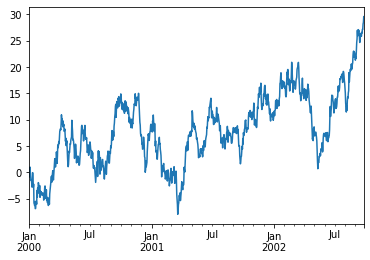

In [78]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

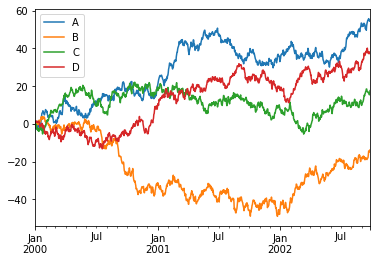

In [79]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

df = df.cumsum()

df.plot()

# 13. Importing / Exporting Data

### CSV

In [80]:
# Writing to a csv file
df.to_csv('data.csv')

In [81]:
# Reading from a csv file
pd.read_csv('data.csv', index_col=0).head()

,A,B,C,D
2000-01-01,-2.443512,-0.478640,0.219835,0.654480
2000-01-02,-1.662504,-1.205288,0.378546,1.406901
2000-01-03,-1.150314,-0.119903,-0.731543,1.016514
2000-01-04,0.029763,0.194898,-0.574956,1.003078
2000-01-05,-1.398535,0.373493,-1.351201,0.826101


### Excel

In [82]:
# Writing to an excel file
df.to_excel('data.xlsx', sheet_name='Sheet1')

In [83]:
# Reading from an excel file
pd.read_excel('data.xlsx', index_col=0).head()

,A,B,C,D
2000-01-01,-2.443512,-0.478640,0.219835,0.654480
2000-01-02,-1.662504,-1.205288,0.378546,1.406901
2000-01-03,-1.150314,-0.119903,-0.731543,1.016514
2000-01-04,0.029763,0.194898,-0.574956,1.003078
2000-01-05,-1.398535,0.373493,-1.351201,0.826101


### HDF5

In [84]:
# Writing to a HDF5 Store
df.to_hdf('data.hdf', 'df')

In [85]:
# Reading from a HDF5 Store 
pd.read_hdf('data.hdf', 'df').head()

,A,B,C,D
2000-01-01,-2.443512,-0.478640,0.219835,0.654480
2000-01-02,-1.662504,-1.205288,0.378546,1.406901
2000-01-03,-1.150314,-0.119903,-0.731543,1.016514
2000-01-04,0.029763,0.194898,-0.574956,1.003078
2000-01-05,-1.398535,0.373493,-1.351201,0.826101
